Run this cell first

In [1]:
import sys
print("python", sys.version)

import pandas as pd
print("pandas", pd.__version__)

import numpy as np
print("numpy", np.__version__)

import matplotlib
print("matplotlib", matplotlib.__version__)
import matplotlib.pyplot as plt

import seaborn as sbn
print("seaborn", sbn.__version__)

import random
import math

import sklearn
print("scikit-learn",sklearn.__version__)

import tensorflow as tf
print("tensorflow", tf.__version__)

import wordcloud
print("wordcloud", wordcloud.__version__)

import nltk
print("nltk", nltk.__version__)

python 3.11.9 (tags/v3.11.9:de54cf5, Apr  2 2024, 10:12:12) [MSC v.1938 64 bit (AMD64)]
pandas 2.2.2
numpy 2.1.3
matplotlib 3.10.1
seaborn 0.13.2
scikit-learn 1.6.1
tensorflow 2.19.0
wordcloud 1.9.4
nltk 3.9.1


Part 1: EDA & Feature Engineering [50 Points]

a. Exploratory Data Analysis [15 Points]

In [2]:
# Loading the Tweets dataset
tweetsData = pd.read_csv('Tweets.csv')

# Displaying the dataset matrix
print(tweetsData.shape)

(14640, 15)


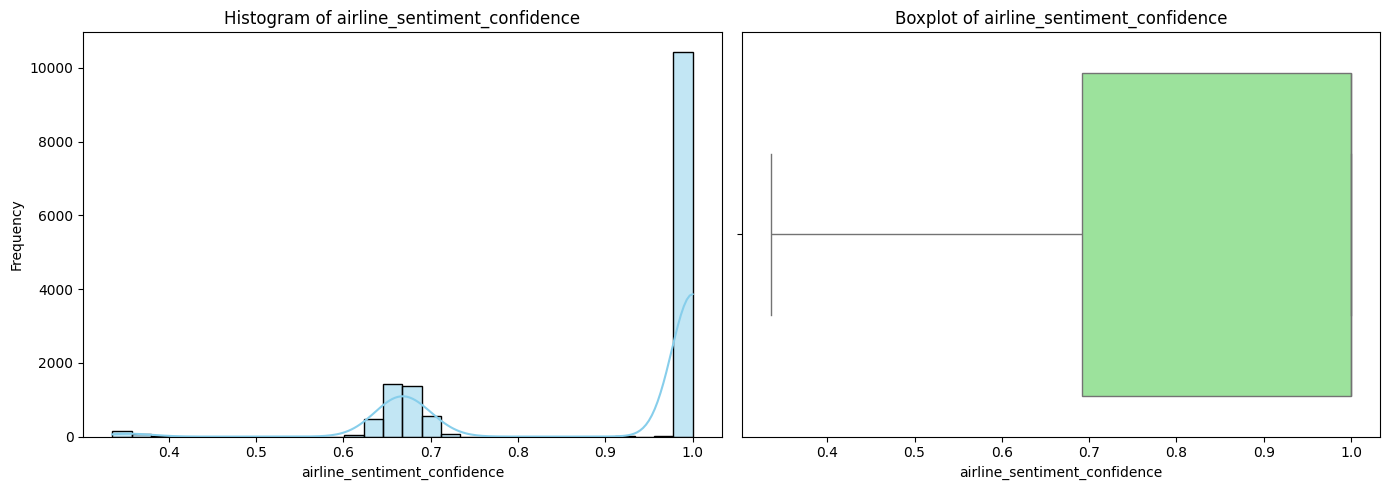

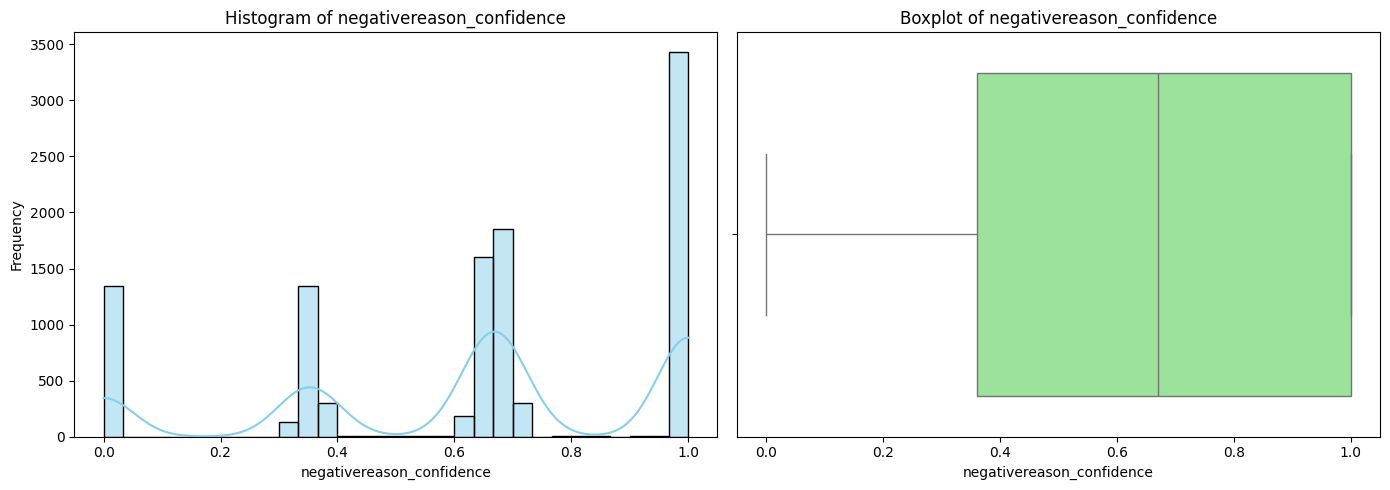

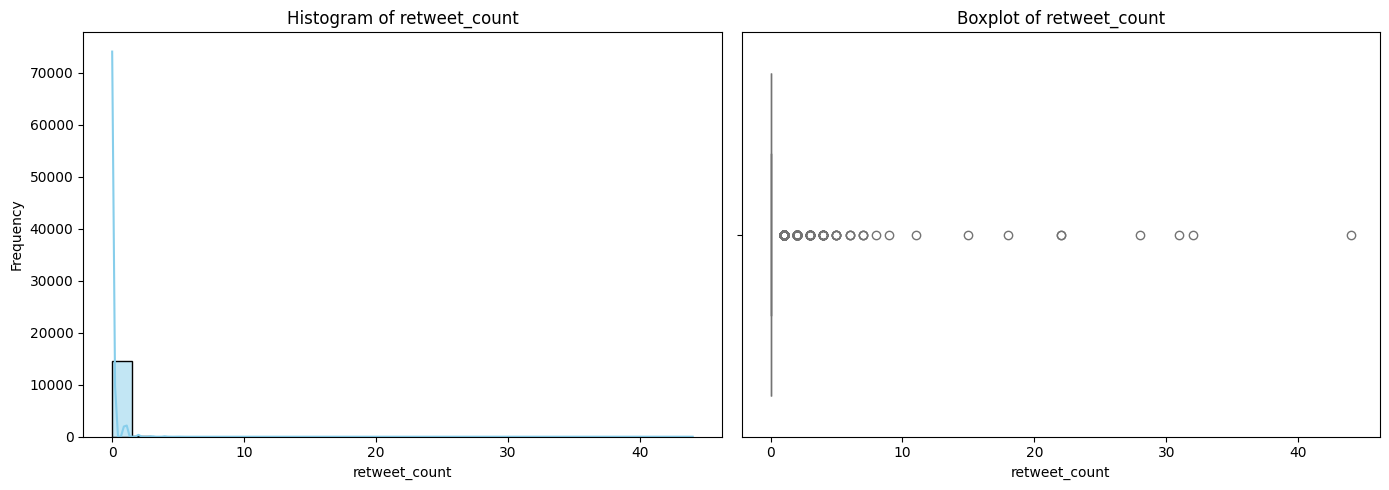

In [3]:
# List of numeric columns to plot
numericColumn = ['airline_sentiment_confidence', 'negativereason_confidence', 'retweet_count']

# Plotting histograms and boxplots for each numeric column
for col in numericColumn:
    plt.figure(figsize=(14, 5))
    
    # Histogram with KDE
    plt.subplot(1, 2, 1)
    sbn.histplot(tweetsData[col], kde=True, bins=30, color='skyblue')
    plt.title(f'Histogram of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    
    # Boxplot 
    plt.subplot(1, 2, 2)
    sbn.boxplot(x=tweetsData[col], color='lightgreen')
    plt.title(f'Boxplot of {col}')
    plt.xlabel(col)
    
    plt.tight_layout()
    plt.show()


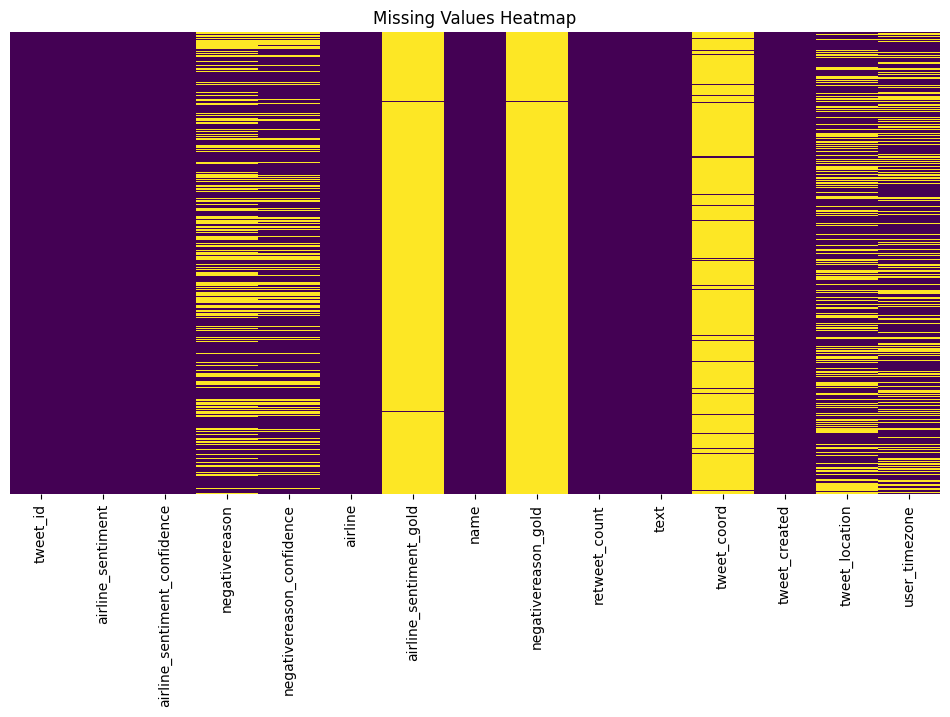

tweet_id                            0
airline_sentiment                   0
airline_sentiment_confidence        0
negativereason                   5462
negativereason_confidence        4118
airline                             0
airline_sentiment_gold          14600
name                                0
negativereason_gold             14608
retweet_count                       0
text                                0
tweet_coord                     13621
tweet_created                       0
tweet_location                   4733
user_timezone                    4820
dtype: int64


In [4]:
# Visualizing missing values for all columns
plt.figure(figsize=(12,6))
sbn.heatmap(tweetsData.isnull(), cbar=False, yticklabels=False, cmap='viridis')
plt.title('Missing Values Heatmap')
plt.show()

# Count of nulls per column
print(tweetsData.isnull().sum())

In [5]:
# Displaying the data types of each column
print(tweetsData.dtypes)

tweet_id                          int64
airline_sentiment                object
airline_sentiment_confidence    float64
negativereason                   object
negativereason_confidence       float64
airline                          object
airline_sentiment_gold           object
name                             object
negativereason_gold              object
retweet_count                     int64
text                             object
tweet_coord                      object
tweet_created                    object
tweet_location                   object
user_timezone                    object
dtype: object


In [6]:
# Imputing numeric columns with median
numericColumn = tweetsData.select_dtypes(include=['number']).columns
for col in numericColumn:
    if col != 'tweet_id':  # Do NOT impute tweet_id
        median_value = tweetsData[col].median()
        tweetsData[col].fillna(median_value, inplace=True)

# Imputing object (string) columns with 'Unknow'
object_cols = tweetsData.select_dtypes(include=['object']).columns
for col in object_cols:
    tweetsData[col].fillna('Unknow', inplace=True)

# Save the cleaned Dataset
tweetsData.to_csv('Tweets_imputed.csv', index=False)

C:\Users\Owner\AppData\Local\Temp\ipykernel_15924\517567895.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  tweetsData[col].fillna(median_value, inplace=True)
C:\Users\Owner\AppData\Local\Temp\ipykernel_15924\517567895.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For exa

In [7]:
tweetsDataImputed = pd.read_csv('Tweets_imputed.csv')

# Impute numeric columns using median
for col in tweetsDataImputed.select_dtypes(include=['int64', 'float64']).columns:
    if tweetsDataImputed[col].isnull().any():
        tweetsDataImputed[col] = tweetsDataImputed[col].fillna(tweetsDataImputed[col].median())

# Impute categorical columns using 'Unknown'
for col in tweetsDataImputed.select_dtypes(include=['object']).columns:
    if tweetsDataImputed[col].isnull().any():
        tweetsDataImputed[col] = tweetsDataImputed[col].fillna('Unknown')

# Confirm that all nulls have been handled
updatetweetsDataImputed = tweetsDataImputed.isnull().sum()

from IPython.display import display
print("Post-Imputation Null Check:")
display(updatetweetsDataImputed.to_frame(name="Missing Values"))

# Corrected shape print
dataCleanedShape = tweetsDataImputed.shape
print("Shape after the dataset is cleaned:", dataCleanedShape)

# Show cleaned data
tweetsDataImputed.head(5) # Displaying the first 5 rows of the cleaned dataset

Post-Imputation Null Check:


,Missing Values
tweet_id,0
airline_sentiment,0
airline_sentiment_confidence,0
negativereason,0
negativereason_confidence,0
airline,0
airline_sentiment_gold,0
name,0
negativereason_gold,0
retweet_count,0


Shape after the dataset is cleaned: (14640, 15)


,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,Unknow,0.6706,Virgin America,Unknow,cairdin,Unknow,0,@VirginAmerica What @dhepburn said.,Unknow,2015-02-24 11:35:52 -0800,Unknow,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,Unknow,0.0000,Virgin America,Unknow,jnardino,Unknow,0,@VirginAmerica plus you've added commercials t...,Unknow,2015-02-24 11:15:59 -0800,Unknow,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,Unknow,0.6706,Virgin America,Unknow,yvonnalynn,Unknow,0,@VirginAmerica I didn't today... Must mean I n...,Unknow,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,Unknow,jnardino,Unknow,0,@VirginAmerica it's really aggressive to blast...,Unknow,2015-02-24 11:15:36 -0800,Unknow,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,Unknow,jnardino,Unknow,0,@VirginAmerica and it's a really big bad thing...,Unknow,2015-02-24 11:14:45 -0800,Unknow,Pacific Time (US & Canada)


In [8]:
from sklearn.preprocessing import MinMaxScaler

# List of columns to normalize
numericColumn = ['airline_sentiment_confidence', 'negativereason_confidence', 'retweet_count']

# Initialize the scaler
scaler = MinMaxScaler()

# Fit and transform the numeric columns in-place
tweetsDataImputed[numericColumn] = scaler.fit_transform(tweetsDataImputed[numericColumn])

In [9]:
from sklearn.preprocessing import StandardScaler

# List the numeric columns to scale (excluding identifiers like 'tweet_id')
numericColumn = ['airline_sentiment_confidence', 'negativereason_confidence', 'retweet_count']

# Initialize the scaler
scaler = StandardScaler()

# Fit and transform the numeric columns
tweetsDataImputed[numericColumn] = scaler.fit_transform(tweetsDataImputed[numericColumn])

# Now tweetsDataImputed contains the scaled features, ready for further analysis or modeling

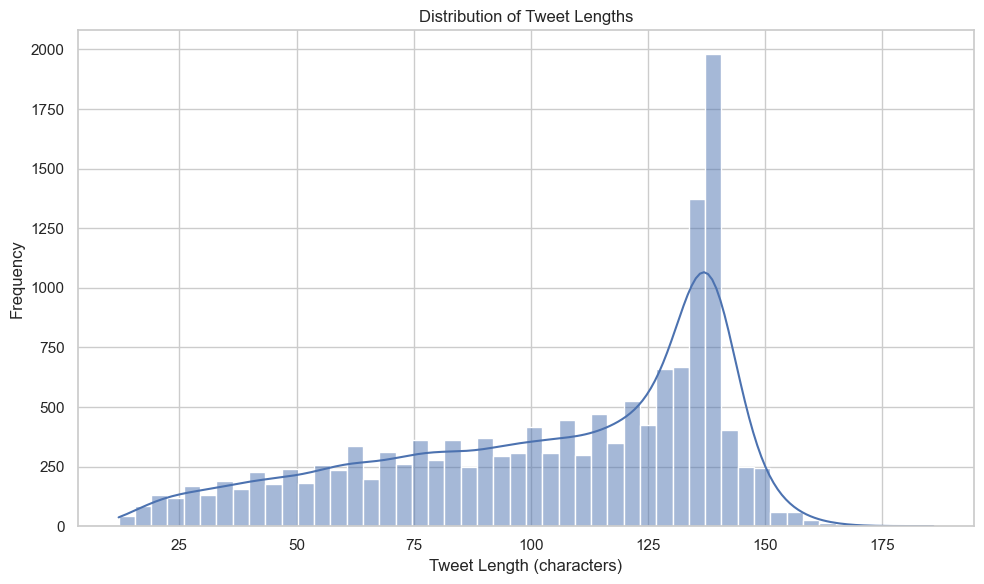

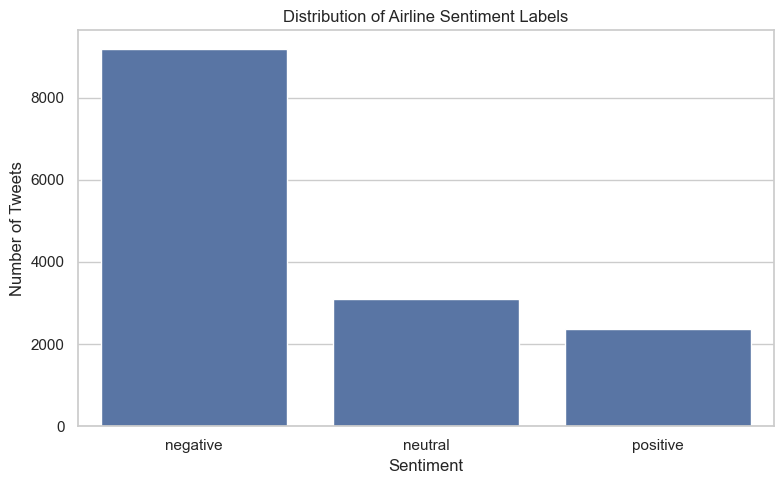

Label Proportions:


,Sentiment,Proportion
0,negative,0.626913
1,neutral,0.211680
2,positive,0.161407


In [10]:
# Calculate tweet lengths
tweetsDataImputed['tweet_length'] = tweetsDataImputed['text'].apply(len)

# Set up the visual style
sbn.set(style="whitegrid")

# Plot 1: Tweet Length Distribution
plt.figure(figsize=(10, 6))
sbn.histplot(tweetsDataImputed['tweet_length'], bins=50, kde=True)
plt.title('Distribution of Tweet Lengths')
plt.xlabel('Tweet Length (characters)')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

# Plot 2: Proportion of Sentiment Labels
plt.figure(figsize=(8, 5))
sbn.countplot(data=tweetsDataImputed, x='airline_sentiment', order=tweetsDataImputed['airline_sentiment'].value_counts().index)
plt.title('Distribution of Airline Sentiment Labels')
plt.xlabel('Sentiment')
plt.ylabel('Number of Tweets')
plt.tight_layout()
plt.show()

# Proportion table
label_proportions = tweetsDataImputed['airline_sentiment'].value_counts(normalize=True).reset_index()
label_proportions.columns = ['Sentiment', 'Proportion']

from IPython.display import display

# Display the label proportions dataframe
print("Label Proportions:")
display(label_proportions)

b. Text Visualization

- Word clouds per class 

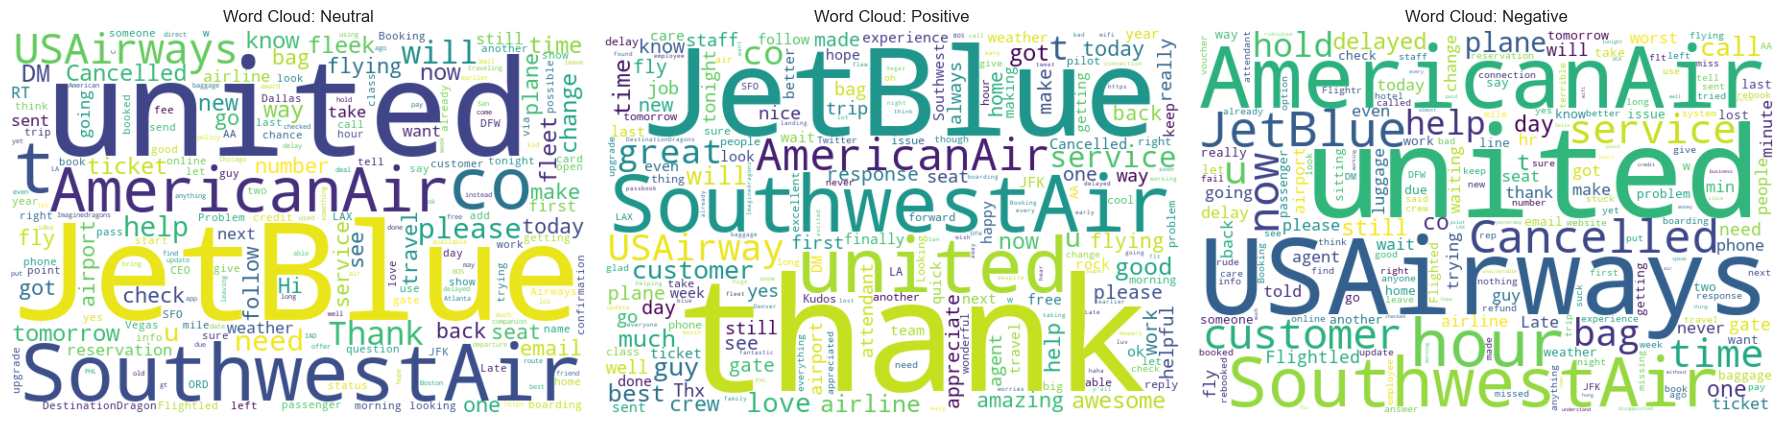

In [11]:
from wordcloud import WordCloud, STOPWORDS

# Optional: Add more stopwords if needed
stopwords = set(STOPWORDS)
stopwords.update(['virginamerica', 'flight', 'flights', 'amp'])  # add domain-specific stopwords

sentiments = tweetsDataImputed['airline_sentiment'].unique()
plt.figure(figsize=(18, 6))

for i, sentiment in enumerate(sentiments):
    text = " ".join(tweetsDataImputed[tweetsDataImputed['airline_sentiment'] == sentiment]['text'].astype(str))
    wordcloud = WordCloud(width=600, height=400, background_color='white', stopwords=stopwords, collocations=False).generate(text)
    plt.subplot(1, len(sentiments), i+1)
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(f'Word Cloud: {sentiment.capitalize()}')
    plt.axis('off')

plt.tight_layout()
plt.show()

- Top n frequent word occurrence

In [12]:
from collections import Counter
import re

def preprocess(text):
    # Remove URLs, mentions, hashtags, and punctuation
    text = re.sub(r"http\S+|@\S+|#\S+", "", text)
    text = re.sub(r"[^\w\s]", "", text)
    return text.lower()

N = 20  # Show top 20 words

for sentiment in sentiments:
    texts = tweetsDataImputed[tweetsDataImputed['airline_sentiment'] == sentiment]['text'].astype(str).apply(preprocess)
    all_words = " ".join(texts).split()
    filtered_words = [w for w in all_words if w not in stopwords and len(w) > 2]
    common_words = Counter(filtered_words).most_common(N)
    print(f"\nTop {N} words for sentiment '{sentiment}':")
    for word, count in common_words:
        print(f"{word}: {count}")



Top 20 words for sentiment 'neutral':
will: 216
please: 178
need: 163
help: 160
thanks: 154
now: 113
fleek: 106
know: 104
tomorrow: 104
fleets: 102
cancelled: 98
time: 92
way: 87
change: 86
one: 78
new: 77
back: 77
number: 76
flying: 76
fly: 74

Top 20 words for sentiment 'positive':
thanks: 606
thank: 453
great: 233
service: 159
love: 128
will: 114
customer: 112
guys: 111
much: 109
good: 108
best: 104
got: 99
awesome: 97
time: 94
now: 88
today: 82
help: 82
airline: 80
amazing: 76
back: 72

Top 20 words for sentiment 'negative':
cancelled: 913
now: 823
service: 741
hours: 644
hold: 607
customer: 603
help: 595
time: 584
plane: 516
delayed: 488
cant: 485
still: 477
call: 448
flightled: 442
hour: 435
one: 434
will: 432
dont: 412
bag: 409
gate: 408


- Tweet/post length histograms 

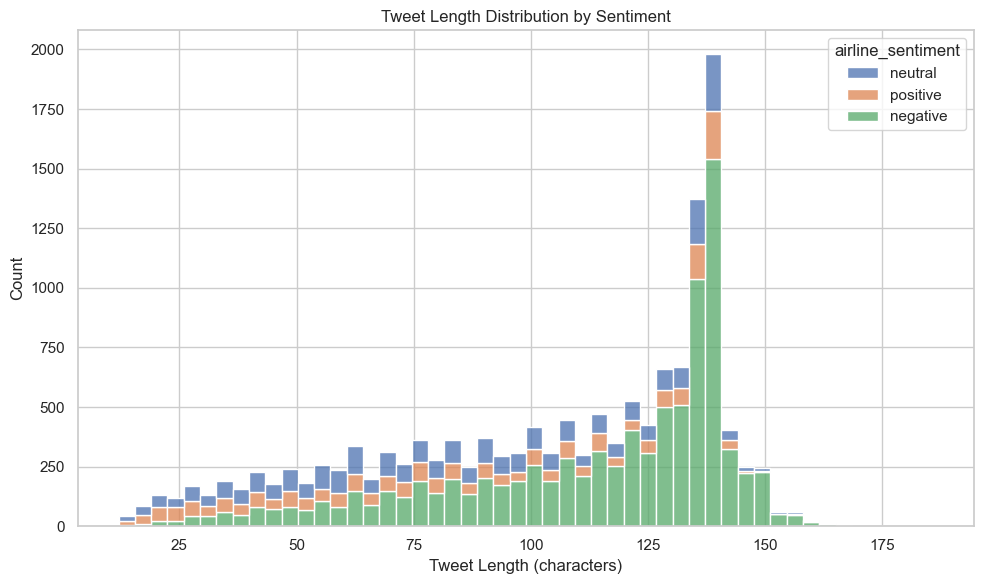

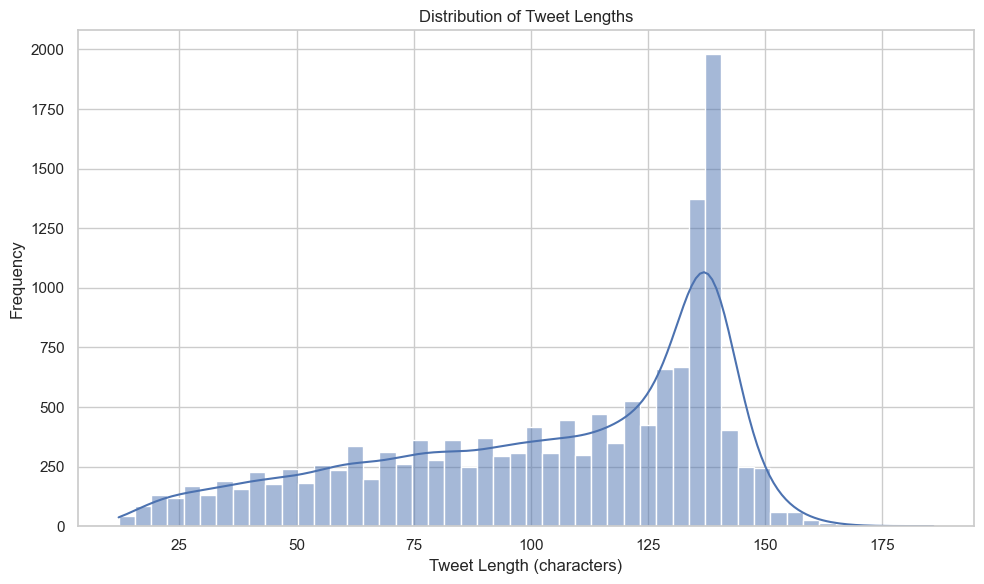

In [13]:
# Plot tweet length histograms
plt.figure(figsize=(10, 6))
sbn.histplot(data=tweetsDataImputed, x='tweet_length', bins=50, hue='airline_sentiment', multiple='stack')
plt.title('Tweet Length Distribution by Sentiment')
plt.xlabel('Tweet Length (characters)')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

# Calculate tweet lengths
tweetsDataImputed['tweet_length'] = tweetsDataImputed['text'].astype(str).apply(len)

plt.figure(figsize=(10, 6))
sbn.histplot(tweetsDataImputed['tweet_length'], bins=50, kde=True)
plt.title('Distribution of Tweet Lengths')
plt.xlabel('Tweet Length (characters)')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()


c. Preprocessing & Feature Engineering
- Clean, tokenize: lowercasing, punctuation removal, stopwords, stemming/lemmatization

In [14]:

import string
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

# Download NLTK resources if not already present
nltk.download('stopwords')
nltk.download('wordnet')

# Preprocessing function
lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words('english'))

def preprocess(text):
    # Lowercase
    text = str(text).lower()
    # Remove punctuation
    text = text.translate(str.maketrans('', '', string.punctuation))
    # Tokenize and remove stopwords, lemmatize
    tokens = [lemmatizer.lemmatize(word) for word in text.split() if word not in stop_words]
    return ' '.join(tokens)

# Apply preprocessing
tweetsDataImputed['cleaned_text'] = tweetsDataImputed['text'].apply(preprocess)

# Display a sample of cleaned text
print("Sample of cleaned text:")
print(tweetsDataImputed[['text', 'cleaned_text']].head(5))


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Owner\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Owner\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


Sample of cleaned text:
                                                text  \
0                @VirginAmerica What @dhepburn said.   
1  @VirginAmerica plus you've added commercials t...   
2  @VirginAmerica I didn't today... Must mean I n...   
3  @VirginAmerica it's really aggressive to blast...   
4  @VirginAmerica and it's a really big bad thing...   

                                        cleaned_text  
0                        virginamerica dhepburn said  
1  virginamerica plus youve added commercial expe...  
2  virginamerica didnt today must mean need take ...  
3  virginamerica really aggressive blast obnoxiou...  
4                 virginamerica really big bad thing  


- Create at least two representations: 
    - Bag of Words 
    - TF-IDF


Bag of Words (sample):
   americanair  cancelled  flight  get  hour  jetblue  southwestair  thanks  \
0            0          0       0    0     0        0             0       0   
1            0          0       0    0     0        0             0       0   
2            0          0       0    0     0        0             0       0   
3            0          0       0    0     0        0             0       0   
4            0          0       0    0     0        0             0       0   

   united  usairways  
0       0          0  
1       0          0  
2       0          0  
3       0          0  
4       0          0  


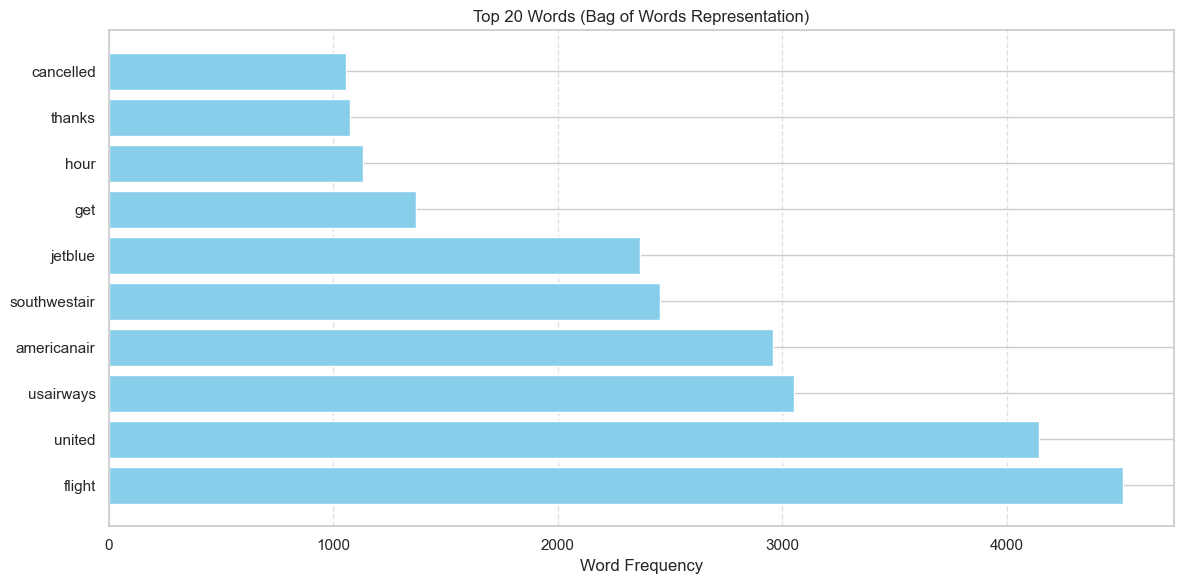

In [15]:
from sklearn.feature_extraction.text import CountVectorizer

# Bag of Words
bow_vectorizer = CountVectorizer(max_features=10)  # Use top 10 for display
bow_matrix = bow_vectorizer.fit_transform(tweetsDataImputed['cleaned_text'])

# Convert to DataFrame for display
bow_tweetsDataImputed = pd.DataFrame(bow_matrix.toarray(), columns=bow_vectorizer.get_feature_names_out())
print("\nBag of Words (sample):")
print(bow_tweetsDataImputed.head())

# Calculate top words and their frequencies
bow_sums = bow_matrix.sum(axis=0)  # Sum up the occurrences of each word
top_bow_indices = bow_sums.argsort()[0, -20:].tolist()[0]  # Get indices of top 20 words
top_bow_words = [bow_vectorizer.get_feature_names_out()[i] for i in top_bow_indices]
top_bow_values = [bow_sums[0, i] for i in top_bow_indices]

# Plot BoW
plt.figure(figsize=(12, 6))
plt.barh(top_bow_words[::-1], top_bow_values[::-1], color='skyblue')
plt.xlabel('Word Frequency')
plt.title('Top 20 Words (Bag of Words Representation)')
plt.grid(axis='x', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


TF-IDF (sample):
   americanair  cancelled  flight  get  hour  jetblue  southwestair  thanks  \
0          0.0        0.0     0.0  0.0   0.0      0.0           0.0     0.0   
1          0.0        0.0     0.0  0.0   0.0      0.0           0.0     0.0   
2          0.0        0.0     0.0  0.0   0.0      0.0           0.0     0.0   
3          0.0        0.0     0.0  0.0   0.0      0.0           0.0     0.0   
4          0.0        0.0     0.0  0.0   0.0      0.0           0.0     0.0   

   united  usairways  
0     0.0        0.0  
1     0.0        0.0  
2     0.0        0.0  
3     0.0        0.0  
4     0.0        0.0  


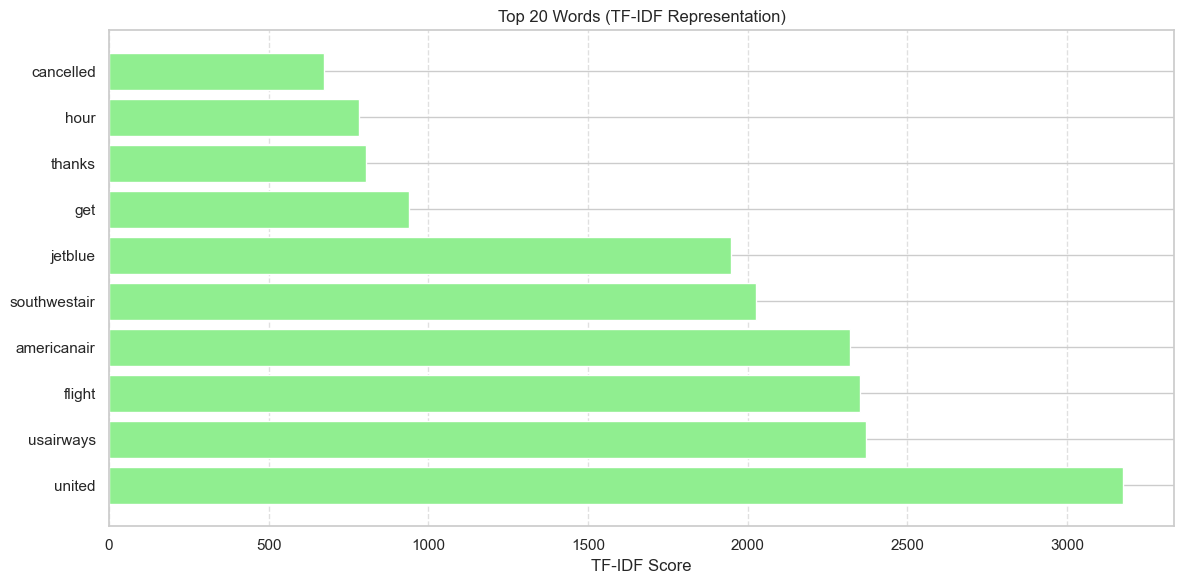

In [16]:
from sklearn.feature_extraction.text import TfidfVectorizer

# TF-IDF
tfidf_vectorizer = TfidfVectorizer(max_features=10)  # Use top 10 for display
tfidf_matrix = tfidf_vectorizer.fit_transform(tweetsDataImputed['cleaned_text'])

# Convert to DataFrame for display
tfidf_tweetsDataImputed = pd.DataFrame(tfidf_matrix.toarray(), columns=tfidf_vectorizer.get_feature_names_out())
print("\nTF-IDF (sample):")
print(tfidf_tweetsDataImputed.head())

# Calculate top words and their TF-IDF scores
tfidf_sums = tfidf_matrix.sum(axis=0)  # Sum up the TF-IDF scores for each word
top_tfidf_indices = tfidf_sums.argsort()[0, -20:].tolist()[0]  # Get indices of top 20 words
top_tfidf_words = [tfidf_vectorizer.get_feature_names_out()[i] for i in top_tfidf_indices]
top_tfidf_values = [tfidf_sums[0, i] for i in top_tfidf_indices]

# Plot TF-IDF
plt.figure(figsize=(12, 6))
plt.barh(top_tfidf_words[::-1], top_tfidf_values[::-1], color='lightgreen')
plt.xlabel('TF-IDF Score')
plt.title('Top 20 Words (TF-IDF Representation)')
plt.grid(axis='x', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()



Part 2: Model Building

In [17]:
# Encoding labels for target variable airline_sentiment
from sklearn.preprocessing import LabelEncoder
from keras.utils import to_categorical # type: ignore
label_encoder= LabelEncoder()
y =label_encoder.fit_transform(tweetsDataImputed['airline_sentiment'])
y_categorical = to_categorical(y) 

In [18]:

from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout, SimpleRNN
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import to_categorical # For one-hot encoding with Keras


In [19]:
#data splitting tfidf
from sklearn.model_selection import train_test_split

X_train_tfidf, X_test_tfidf, y_train_tfidf, y_test_tfidf = train_test_split(tfidf_matrix, y, test_size=0.2, random_state=42)


In [20]:
# Create Bag of Words matrix
from sklearn.feature_extraction.text import CountVectorizer
bow_vectorizer = CountVectorizer(max_features=5000)  # Adjust max_features as needed
bow_matrix = bow_vectorizer.fit_transform(tweetsDataImputed['cleaned_text'])

# Data splitting for Bag of Words
from sklearn.model_selection import train_test_split
X_train_bow, X_test_bow, y_train_bow, y_test_bow = train_test_split(bow_matrix, y, test_size=0.2, random_state=42)


In [21]:
#function that will give accuracy, precision, recall, f1 score , confusion matrix with its visualization and classification report

def model_performance_evaluation(model_name, y_actual, y_pred,label_encoder):
    accuracy = accuracy_score(y_actual, y_pred)
    precision  = precision_score(y_actual, y_pred ,average='weighted')
    recall = recall_score(y_actual, y_pred,average='weighted')
    f1Score = f1_score(y_actual, y_pred,average='weighted')
    cf_matrix = confusion_matrix(y_actual, y_pred)
    class_report = classification_report(y_actual, y_pred)
    
    print(f"\n{model_name} Performance Matrix:")
    print("Accuracy",accuracy * 100)
    print("Precision :",round(precision, 4))
    print("Recall :",round(recall, 4))
    print("F1-score :",round(f1Score, 4))
    print("Confusion Matrix:")
    print(cf_matrix)
    print("\nClassification Report:")
    print(class_report)
    
   
    # Visualizing confusion matrix
    plt.figure(figsize=(6, 5))
    sbn.heatmap(cf_matrix, annot=True, fmt='d', cmap='Blues',
                xticklabels=label_encoder.classes_,
                yticklabels=label_encoder.classes_)
    plt.xlabel('Predicted Values')
    plt.ylabel('Actual Values')
    plt.title(f'Confusion Matrix - {model_name}')
    plt.tight_layout()
    plt.show()  
    
    return {
        'model': model_name,
        'accuracy': accuracy,
        'precision': precision,
        'recall': recall,
        'f1': f1Score
    }

In [22]:
#defining list to store model performance stats which can be used later to compare model performance 
model_performance_results=[]

Logistic Regression tifdf


Logistic Regression Model tifdf  Performance Matrix:
Accuracy 61.81693989071039
Precision : 0.621
Recall : 0.6182
F1-score : 0.6189
Confusion Matrix:
[[1446  243  200]
 [ 270  163  147]
 [ 145  113  201]]

Classification Report:
              precision    recall  f1-score   support

           0       0.78      0.77      0.77      1889
           1       0.31      0.28      0.30       580
           2       0.37      0.44      0.40       459

    accuracy                           0.62      2928
   macro avg       0.49      0.49      0.49      2928
weighted avg       0.62      0.62      0.62      2928



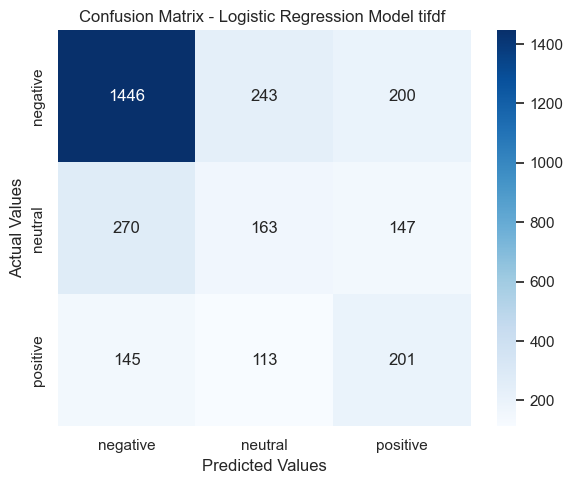

In [23]:
#training logistic regression model simple/explainable model
logistic_regression = LogisticRegression(max_iter=1000, class_weight='balanced', random_state=42)
logistic_regression.fit(X_train_tfidf, y_train_tfidf)
y_pred_logistic = logistic_regression.predict(X_test_tfidf)
model_performance_results.append(model_performance_evaluation("Logistic Regression Model tifdf ",y_test_tfidf, y_pred_logistic,label_encoder))


Logistic Regression BOW


Logistic Regression Model bow   Performance Matrix:
Accuracy 76.2636612021858
Precision : 0.791
Recall : 0.7626
F1-score : 0.7717
Confusion Matrix:
[[1491  299   99]
 [ 112  387   81]
 [  43   61  355]]

Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.79      0.84      1889
           1       0.52      0.67      0.58       580
           2       0.66      0.77      0.71       459

    accuracy                           0.76      2928
   macro avg       0.70      0.74      0.71      2928
weighted avg       0.79      0.76      0.77      2928



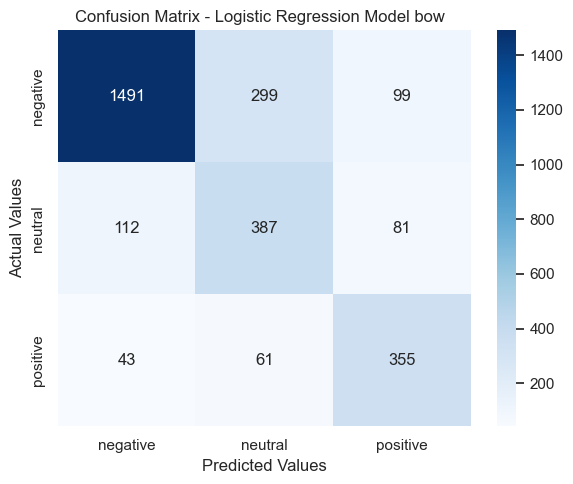

In [24]:
#training logistic regression model simple/explainable model
logistic_regression_bow = LogisticRegression(max_iter=1000, class_weight='balanced', random_state=42)
logistic_regression_bow.fit(X_train_bow, y_train_bow)
y_pred_logistic_bow = logistic_regression_bow.predict(X_test_bow)
model_performance_results.append(model_performance_evaluation("Logistic Regression Model bow  ",y_test_bow, y_pred_logistic_bow,label_encoder))


DecisionTree tfidf


Decision Tree Model tifdf  Performance Matrix:
Accuracy 61.236338797814206
Precision : 0.6185
Recall : 0.6124
F1-score : 0.6146
Confusion Matrix:
[[1425  251  213]
 [ 265  166  149]
 [ 150  107  202]]

Classification Report:
              precision    recall  f1-score   support

           0       0.77      0.75      0.76      1889
           1       0.32      0.29      0.30       580
           2       0.36      0.44      0.39       459

    accuracy                           0.61      2928
   macro avg       0.48      0.49      0.49      2928
weighted avg       0.62      0.61      0.61      2928



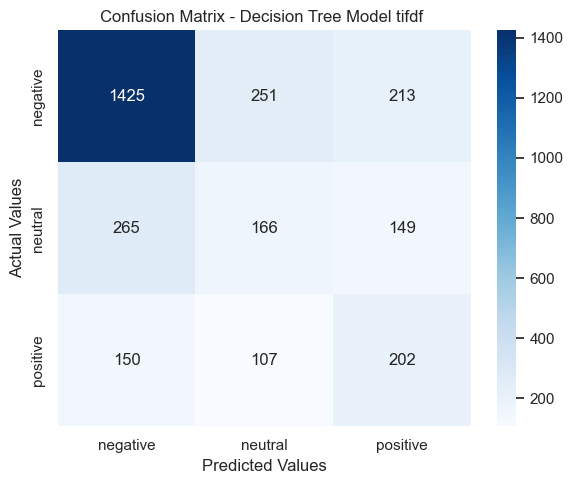

In [25]:
decision_tree=DecisionTreeClassifier(class_weight='balanced', random_state=42)
decision_tree.fit(X_train_tfidf, y_train_tfidf)
y_pred_decision_tree = decision_tree.predict(X_test_tfidf)
model_performance_results.append(model_performance_evaluation("Decision Tree Model tifdf ",y_test_tfidf, y_pred_decision_tree,label_encoder))


Decision tree BOW


Decision Tree Model bow  Performance Matrix:
Accuracy 61.236338797814206
Precision : 0.6185
Recall : 0.6124
F1-score : 0.6146
Confusion Matrix:
[[1425  251  213]
 [ 265  166  149]
 [ 150  107  202]]

Classification Report:
              precision    recall  f1-score   support

           0       0.77      0.75      0.76      1889
           1       0.32      0.29      0.30       580
           2       0.36      0.44      0.39       459

    accuracy                           0.61      2928
   macro avg       0.48      0.49      0.49      2928
weighted avg       0.62      0.61      0.61      2928



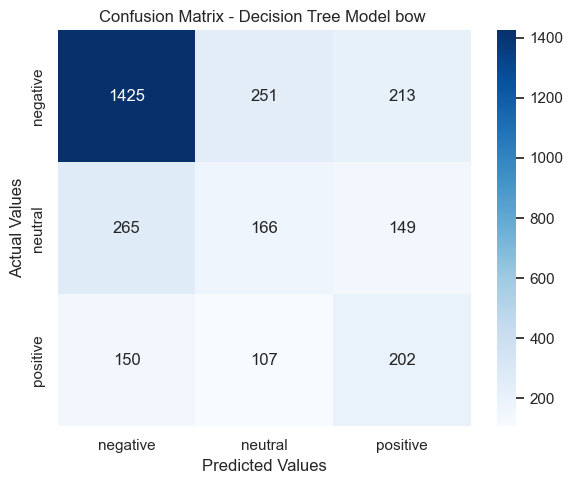

In [26]:
#BOW
decision_tree_bow=DecisionTreeClassifier(class_weight='balanced', random_state=42)
decision_tree_bow.fit(X_train_tfidf, y_train_tfidf)
y_pred_decision_tree_bow = decision_tree_bow.predict(X_test_tfidf)
model_performance_results.append(model_performance_evaluation("Decision Tree Model bow ",y_test_bow, y_pred_decision_tree_bow,label_encoder))


LSTM (black-box)

c:\Users\Owner\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\core\embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm (LSTM)                     │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
293/293 ━━━━━━━━━━━━━━━━━━━━ 12s 31ms/step - accuracy: 0.6592 - loss: 0.7976 - val_accuracy: 0.7533 - val_loss: 0.6086
Epoch 2/10
293/293 ━━━━━━━━━━━━━━━━━━━━ 9s 32ms/step - accuracy: 0.7970 - loss: 0.5089 - val_accuracy: 0.7712 - val_loss: 0.6039
Epoch 3/10
293/293 ━━━━━━━━━━━━━━━━━━━━ 10s 33ms/step - accuracy: 0.8660 - loss: 0.3610 - val_accuracy: 0.7781 - val_loss: 0.6218
Epoch 4/10
293/293 ━━━━━━━━━━━━━━━━━━━━ 10s 33ms/step - accuracy: 0.8874 - loss: 0.3201 - val_accuracy: 0.7665 - val_loss: 0.6436
Epoch 5/10
293/293 ━━━━━━━━━━━━━━━━━━━━ 10s 34ms/step - accuracy: 0.9149 - loss: 0.2594 - val_accuracy: 0.7661 - val_loss: 0.6624
Epoch 6/10
293/293 ━━━━━━━━━━━━━━━━━━━━ 10s 33ms/step - accuracy: 0.9306 - loss: 0.2149 - val_accuracy: 0.7648 - val_loss: 0.7495
Epoch 7/10
293/293 ━━━━━━━━━━━━━━━━━━━━ 10s 33ms/step - accuracy: 0.9420 - loss: 0.1794 - val_accuracy: 0.7512 - val_loss: 0.9291
Epoch 8/10
293/293 ━━━━━━━━━━━━━━━━━━━━ 10s 33ms/step - accuracy: 0.9380 - loss: 0.1827 - v

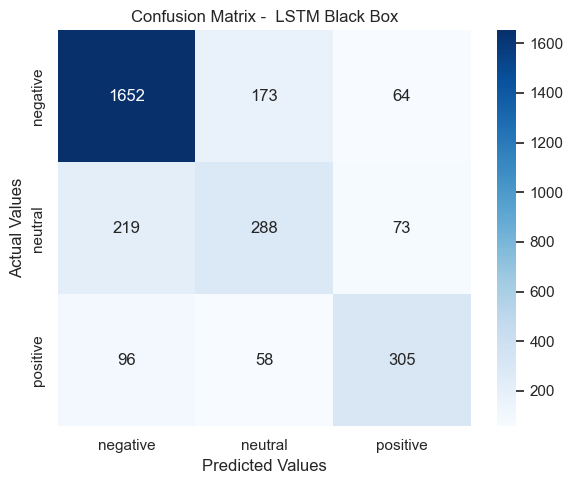

In [27]:
#tokenizer initialization
words=5000
tkn = Tokenizer(num_words=words)
#fitting on cleaned text
tkn.fit_on_texts(tweetsDataImputed['cleaned_text'])
#converting into seq for integer
seqc = tkn.texts_to_sequences(tweetsDataImputed['cleaned_text'])
#adding padding
pad_seqc = pad_sequences(seqc, maxlen=max(len(s) for s in seqc), padding='post')


X_train_lstm, X_test_lstm, y_train_lstm, y_test_lstm = train_test_split( pad_seqc, y_categorical, test_size=0.2, random_state=42)

# Build LSTM model
lstm = Sequential([Embedding(input_dim=5000, output_dim=128, input_length=500),LSTM(128, return_sequences=True),Dropout(0.5),LSTM(64),Dropout(0.3),Dense(len(label_encoder.classes_), activation='softmax')
])

lstm.compile(optimizer='adam',metrics=['accuracy'],loss='categorical_crossentropy',)

lstm.summary()
lstm_h = lstm.fit(X_train_lstm, y_train_lstm, epochs=10,batch_size=32,validation_split=0.2,verbose=1)
y_pred_lstm = np.argmax(lstm.predict(X_test_lstm), axis=1)
model_performance_results.append(model_performance_evaluation(" LSTM Black Box",(np.argmax(y_test_lstm, axis=1)), y_pred_lstm,label_encoder))




RNN(Black Box)

c:\Users\Owner\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\core\embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_1 (Embedding)         │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ simple_rnn (SimpleRNN)          │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
293/293 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - accuracy: 0.6634 - loss: 0.7879 - val_accuracy: 0.7426 - val_loss: 0.6381
Epoch 2/10
293/293 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.8264 - loss: 0.4521 - val_accuracy: 0.7614 - val_loss: 0.6425
Epoch 3/10
293/293 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.9091 - loss: 0.2663 - val_accuracy: 0.7303 - val_loss: 0.7678
Epoch 4/10
293/293 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.9466 - loss: 0.1641 - val_accuracy: 0.7029 - val_loss: 0.9006
Epoch 5/10
293/293 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.9703 - loss: 0.1027 - val_accuracy: 0.7055 - val_loss: 1.0064
Epoch 6/10
293/293 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.9732 - loss: 0.0893 - val_accuracy: 0.7294 - val_loss: 1.1094
Epoch 7/10
293/293 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.9778 - loss: 0.0712 - val_accuracy: 0.7234 - val_loss: 1.2018
Epoch 8/10
293/293 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.9870 - loss: 0.0476 - val_accuracy: 0.

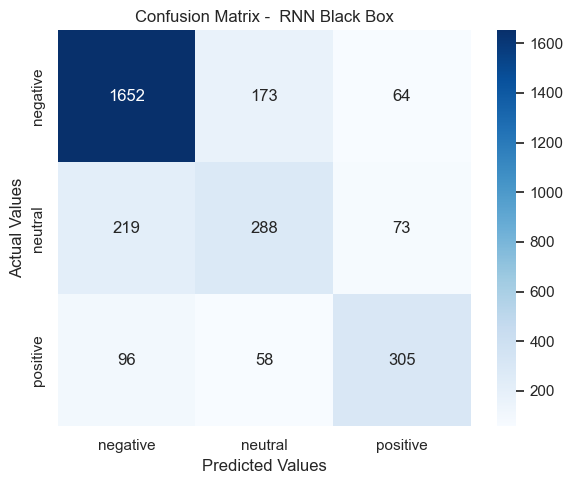

In [28]:
# Build RNN  model
rnn = Sequential([Embedding(words, 64, input_length=500),SimpleRNN(64),Dense(len(label_encoder.classes_), activation='softmax') 
    ])
rnn.compile(optimizer='adam',metrics=['accuracy'],loss='categorical_crossentropy',)
rnn.summary()
rnn_h = rnn.fit(X_train_lstm, y_train_lstm, epochs=10,batch_size=32,validation_split=0.2,verbose=1)
y_pred_rnn = np.argmax(lstm.predict(X_test_lstm), axis=1)
model_performance_results.append(model_performance_evaluation(" RNN Black Box",(np.argmax(y_test_lstm, axis=1)), y_pred_rnn,label_encoder))



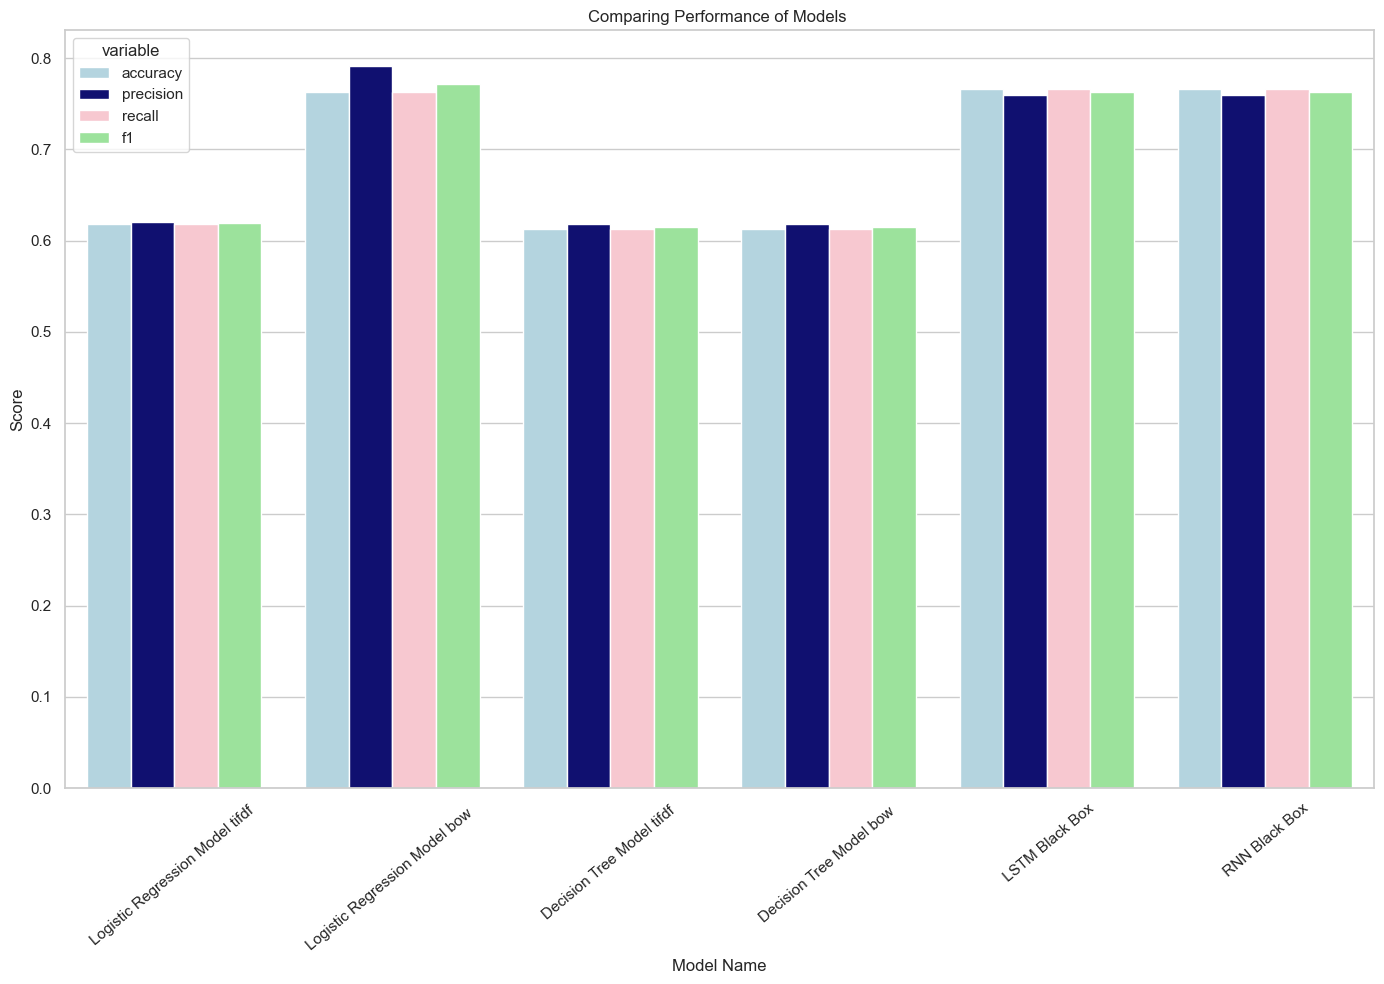

In [29]:
# Comparing performances of models
performace_stats = pd.DataFrame(model_performance_results)
c=['lightblue', 'navy', 'pink', 'lightgreen']
plt.figure(figsize=(14, 10))
sbn.barplot(data=performace_stats.melt(id_vars='model', value_vars=['accuracy', 'precision', 'recall', 'f1']),
            x='model', y='value', hue='variable',palette=c)
plt.title('Comparing Performance of Models ')
plt.xlabel('Model Name')
plt.ylabel('Score')

plt.xticks(rotation=40)
plt.tight_layout()
plt.show()

Part 3: Interpretation, Error Analysis & Trade-Offs

a. Error Analysis

In [30]:
# Error Analysis
y_pred_logistic = logistic_regression.predict(X_test_tfidf)
y_pred_decision_tree = decision_tree.predict(X_test_tfidf)
y_pred_lstm = np.argmax(lstm.predict(X_test_lstm), axis=1)
y_pred_rnn = np.argmax(rnn.predict(X_test_lstm), axis=1)  # fix from lstm

def show_misclassified_examples(X_test, y_test, y_pred, model_name, label_encoder, tweetsDataImputed):
    print(f"\nShowing Misclassified Examples for {model_name}")
    
    # Find indices where actual ≠ predicted
    misclassified_indices = np.where(y_test != y_pred)[0]
    
    # Pick a random sample of 10-15 misclassifications
    sample_indices = np.random.choice(misclassified_indices, size=min(15, len(misclassified_indices)), replace=False)
    
    # Display
    for idx in sample_indices:
        true_label = label_encoder.inverse_transform([y_test[idx]])[0]
        predicted_label = label_encoder.inverse_transform([y_pred[idx]])[0]
        
        if isinstance(X_test, np.ndarray):
            text_idx = idx
        else:
            text_idx = X_test.indices[idx] if hasattr(X_test, 'indices') else idx
        
        print(f"Tweet: {tweetsDataImputed['text'].iloc[text_idx]}")
        print(f"True Label: {true_label}")
        print(f"Predicted Label: {predicted_label}")
        print("-" * 80)


92/92 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step
92/92 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step


In [31]:
# For Logistic Regression model
show_misclassified_examples(X_test_tfidf, y_test_tfidf, y_pred_logistic, "Logistic Regression", label_encoder, tweetsDataImputed)

# For Decision Tree model
show_misclassified_examples(X_test_tfidf, y_test_tfidf, y_pred_decision_tree, "Decision Tree", label_encoder, tweetsDataImputed)

# For LSTM model
show_misclassified_examples(X_test_lstm, np.argmax(y_test_lstm, axis=1), y_pred_lstm, "LSTM", label_encoder, tweetsDataImputed)

# For RNN model
show_misclassified_examples(X_test_lstm, np.argmax(y_test_lstm, axis=1), y_pred_rnn, "RNN", label_encoder, tweetsDataImputed)



Showing Misclassified Examples for Logistic Regression
Tweet: @virginamerica Well, I didn't…but NOW I DO! :-D
True Label: neutral
Predicted Label: negative
--------------------------------------------------------------------------------
Tweet: @virginamerica Well, I didn't…but NOW I DO! :-D
True Label: negative
Predicted Label: positive
--------------------------------------------------------------------------------
Tweet: @virginamerica Well, I didn't…but NOW I DO! :-D
True Label: negative
Predicted Label: neutral
--------------------------------------------------------------------------------
Tweet: @VirginAmerica yes, nearly every time I fly VX this “ear worm” won’t go away :)
True Label: neutral
Predicted Label: positive
--------------------------------------------------------------------------------
Tweet: @VirginAmerica yes, nearly every time I fly VX this “ear worm” won’t go away :)
True Label: neutral
Predicted Label: positive
--------------------------------------------------

b. Class Sensitivity & Confusion Patterns


Classification Report for Logistic Regression:
              precision    recall  f1-score   support

    negative       0.78      0.77      0.77      1889
     neutral       0.31      0.28      0.30       580
    positive       0.37      0.44      0.40       459

    accuracy                           0.62      2928
   macro avg       0.49      0.49      0.49      2928
weighted avg       0.62      0.62      0.62      2928



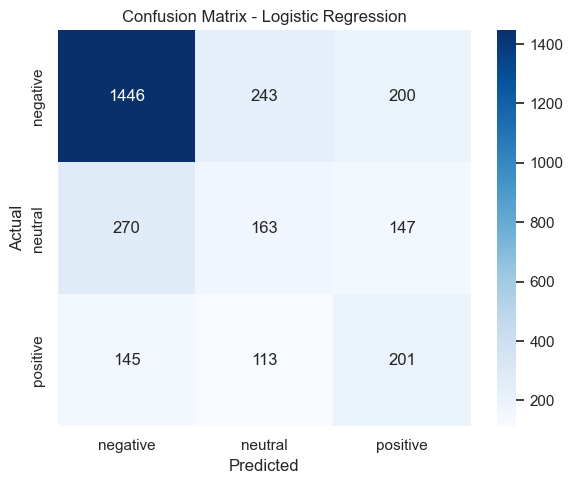


Classification Report for Decision Tree:
              precision    recall  f1-score   support

    negative       0.78      0.77      0.77      1889
     neutral       0.31      0.28      0.30       580
    positive       0.37      0.44      0.40       459

    accuracy                           0.62      2928
   macro avg       0.49      0.49      0.49      2928
weighted avg       0.62      0.62      0.62      2928



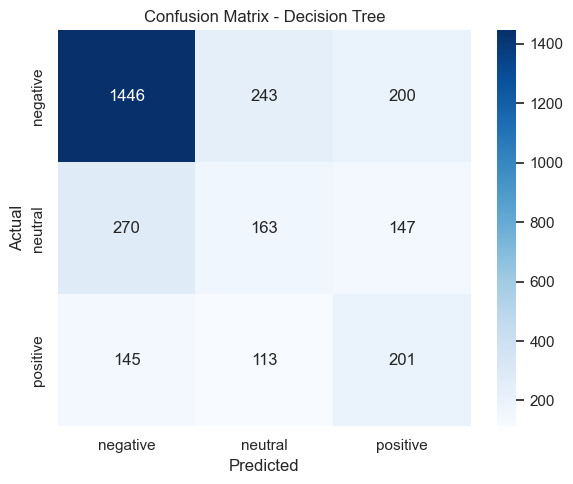


Classification Report for LSTM:
              precision    recall  f1-score   support

    negative       0.84      0.87      0.86      1889
     neutral       0.55      0.50      0.52       580
    positive       0.69      0.66      0.68       459

    accuracy                           0.77      2928
   macro avg       0.69      0.68      0.69      2928
weighted avg       0.76      0.77      0.76      2928



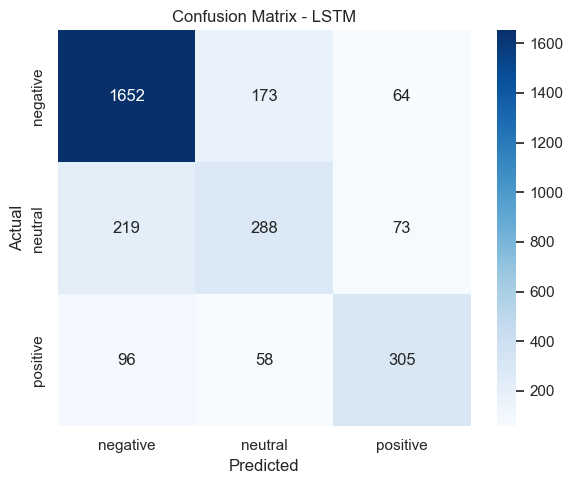


Classification Report for RNN:
              precision    recall  f1-score   support

    negative       0.82      0.88      0.85      1889
     neutral       0.49      0.42      0.45       580
    positive       0.62      0.56      0.59       459

    accuracy                           0.74      2928
   macro avg       0.64      0.62      0.63      2928
weighted avg       0.72      0.74      0.73      2928



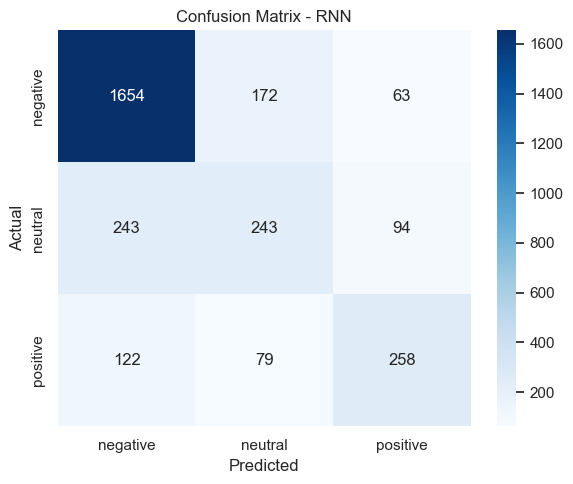

In [32]:
# 3b Class Sensitivity & Confusion Patterns
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
def plot_confusion_matrix(y_true, y_pred, model_name, label_encoder):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(6, 5))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=label_encoder.classes_,
                yticklabels=label_encoder.classes_)
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title(f'Confusion Matrix - {model_name}')
    plt.tight_layout()
    plt.show()
def show_classification_report(y_true, y_pred, model_name, label_encoder):
    print(f"\nClassification Report for {model_name}:")
    report = classification_report(y_true, y_pred, target_names=label_encoder.classes_)
    print(report)
# Logistic Regression
show_classification_report(y_test_tfidf, y_pred_logistic, "Logistic Regression", label_encoder)
plot_confusion_matrix(y_test_tfidf, y_pred_logistic, "Logistic Regression", label_encoder)

# Decision Tree
show_classification_report(y_test_tfidf, y_pred_logistic, "Decision Tree", label_encoder)
plot_confusion_matrix(y_test_tfidf, y_pred_logistic, "Decision Tree", label_encoder)

# LSTM
show_classification_report(np.argmax(y_test_lstm, axis=1), y_pred_lstm, "LSTM", label_encoder)
plot_confusion_matrix(np.argmax(y_test_lstm, axis=1), y_pred_lstm, "LSTM", label_encoder)

# RNN
show_classification_report(np.argmax(y_test_lstm, axis=1), y_pred_rnn, "RNN", label_encoder)
plot_confusion_matrix(np.argmax(y_test_lstm, axis=1), y_pred_rnn, "RNN", label_encoder)
